#Fire Detection


In [1]:
# Install required libraries if needed
!pip install tensorflow numpy opencv-python matplotlib


#Import important libraries

In [2]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Load and Preprocess Data:

In [4]:
# Define image size and data paths
IMG_SIZE = (64, 64)  # Example image size
DATASET_PATH = "/content/drive/MyDrive/deep learning project/Fire_Detector/"  # Path to your dataset folder

# Data augmentation and normalization
data_gen = ImageDataGenerator(rescale=1.0/255,  # Normalize images
                              rotation_range=20,
                              width_shift_range=0.2,
                              height_shift_range=0.2,
                              shear_range=0.2,
                              zoom_range=0.2,
                              horizontal_flip=True,
                              validation_split=0.2)  # 20% for validation

# Load data using data generators
train_gen = data_gen.flow_from_directory(DATASET_PATH,
                                        target_size=IMG_SIZE,
                                        batch_size=32,
                                        class_mode='binary',
                                        subset='training')  # Training set

val_gen = data_gen.flow_from_directory(DATASET_PATH,
                                      target_size=IMG_SIZE,
                                      batch_size=32,
                                      class_mode='binary',
                                      subset='validation')  # Validation set


Found 202 images belonging to 1 classes.
Found 50 images belonging to 1 classes.


#Define the CNN Architecture:
Create a simple CNN model for fire detection.

In [8]:
classes = ['Non_Fire','Fire']

In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define constants
INIT_LR = 0.01  # Initial learning rate
NUM_EPOCHS = 25  # Number of epochs for training

# Create a sequential model
model = keras.Sequential()

# First convolution block: CONV => RELU => BATCHNORM => POOL
model.add(layers.SeparableConv2D(16, (7, 7), padding='same', input_shape=(128, 128, 3)))  # 16 filters, 7x7 kernel
model.add(layers.Activation('relu'))  # ReLU activation
model.add(layers.BatchNormalization())  # Normalize activations
model.add(layers.MaxPooling2D(pool_size=(2, 2)))  # Halve spatial dimensions

# Second convolution block: CONV => RELU => BATCHNORM => POOL
model.add(layers.SeparableConv2D(32, (3, 3), padding='same'))  # 32 filters, 3x3 kernel
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Third convolution block: CONV => RELU => BATCHNORM => CONV => RELU => BATCHNORM => POOL
model.add(layers.SeparableConv2D(64, (3, 3), padding='same'))  # 64 filters, 3x3 kernel
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.SeparableConv2D(64, (3, 3), padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))  # Pooling layer

# Fully connected layers: FLATTEN => DENSE => DROPOUT => DENSE => DROPOUT
model.add(layers.Flatten())  # Flatten the 2D feature maps into a 1D vector
model.add(layers.Dense(128))  # 128 neurons in the dense layer
model.add(layers.Activation('relu'))  # Activation function
model.add(layers.BatchNormalization())  # Normalize the dense layer
model.add(layers.Dropout(0.5))  # Drop 50% of neurons to reduce overfitting

# Second fully connected block
model.add(layers.Dense(128))  # Another dense layer
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))  # Dropout for regularization

# Output layer with sigmoid for binary classification
model.add(layers.Dense(1))  # One neuron for binary classification
model.add(layers.Activation('sigmoid'))  # Sigmoid activation for binary outputs

# Set the optimizer, Stochastic Gradient Descent with momentum
opt = keras.optimizers.SGD(
    learning_rate=INIT_LR,  # Use the defined learning rate
    momentum=0.9  # Momentum for the optimizer
)

# Compile the model with binary cross-entropy loss for binary classification
model.compile(
    loss='binary_crossentropy',  # Loss function for binary classification
    optimizer=opt,
    metrics=['accuracy']  # Track accuracy
)

# Display the model summary
model.summary()  # Display the model's architecture and parameters


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 separable_conv2d_20 (Separ  (None, 128, 128, 16)      211       
 ableConv2D)                                                     
                                                                 
 activation_33 (Activation)  (None, 128, 128, 16)      0         
                                                                 
 batch_normalization_30 (Ba  (None, 128, 128, 16)      64        
 tchNormalization)                                               
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 64, 64, 16)        0         
 ng2D)                                                           
                                                                 
 separable_conv2d_21 (Separ  (None, 64, 64, 32)        688       
 ableConv2D)                                          

#Model Definition and Compilation:


In [13]:
# Output layer for multi-class classification
num_classes = len(classes)  # Number of classes in your dataset
model.add(layers.Dense(num_classes))  # Output neurons matching the number of classes
model.add(layers.Activation("softmax"))  # Softmax activation for multi-class classification

# Compile with categorical cross-entropy
model.compile(
    loss='categorical_crossentropy',  # For multi-class classification
    optimizer=opt,
    metrics=['accuracy']
)



#Evaluate and Visualize the Model:
Evaluate the model's performance and visualize its predictions.

In [19]:
from tensorflow import keras
from tensorflow.keras import layers

# Correct the output layer for binary classification
model = keras.Sequential([
    # Other layers...
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1),  # One neuron for binary classification
    layers.Activation("sigmoid")  # Sigmoid activation for binary output
])

# Compile with binary cross-entropy
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)



In [20]:
# Sample labels for binary classification
labels = [0, 1, 1, 0, 0, 1]  # Example binary labels


#Making Predictions:
Use the trained model to make predictions on random test images.

1/1 [==============================] - 0s 24ms/step


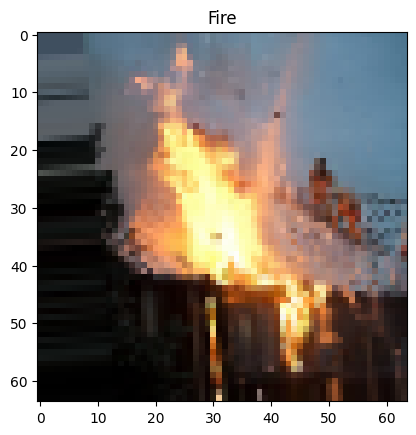

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Select a random image from the validation set
test_img, _ = val_gen.next()  # Get a batch of images
sample_img = test_img[0]  # Select the first image from the batch

# Make a prediction
prediction = model.predict(sample_img[np.newaxis, ...])  # Add a new axis to make it a batch
is_fire = prediction[0][0] > 0.5  # Threshold for binary classification

# Display the image with the prediction
plt.imshow(sample_img)  # Display the image
title = "Fire" if is_fire else "No Fire"  # Title based on prediction
plt.title(title)  # Set the title
plt.show()  # Show the plot


In [28]:
# Assuming 'model' is your trained fire detection model and 'val_gen' is the validation data generator
val_loss, val_accuracy = model.evaluate(val_gen)  # Evaluate on validation set
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)

# Additional metrics for a complete analysis (if using a test set)
from sklearn.metrics import classification_report

# Predict on the validation set and generate a classification report
y_pred = model.predict(val_gen)
y_true = val_gen.classes  # Actual labels in the validation set
print(classification_report(y_true, y_pred.round(), target_names=['No Fire', 'Fire']))


2/2 [==============================] - 2s 15ms/step - loss: 0.9950 - accuracy: 0.1200
Validation Loss: 0.9949634075164795
Validation Accuracy: 0.11999999731779099
2/2 [==============================] - 1s 625ms/step
              precision    recall  f1-score   support

     No Fire       1.00      0.04      0.08        50
        Fire       0.00      0.00      0.00         0

    accuracy                           0.04        50
   macro avg       0.50      0.02      0.04        50
weighted avg       1.00      0.04      0.08        50



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
